In [ ]:
#IMPORT STATEMENTS
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


In [ ]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/TCSion/weatherAUS.csv')

In [ ]:
#STORING THE DATA IN ANOTHER DF
data
df=data
print(df)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ... 

In [ ]:
#RETRIEVING THE INFO
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [ ]:
#FINGING WHICH ARE OBJ
elements = df.select_dtypes(include=['object']).columns

print(elements)

for i in elements:
    df[i] = df[i].fillna(df[i].mode()[0])

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [ ]:
#FINDING WHICH ARE FLOAT
cont = df.select_dtypes(include=['float']).columns

print(cont)

for i in cont:
    df[i] = df[i].fillna(df[i].mean())
df

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,...,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,...,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,...,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,...,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,No,0.0,No


In [ ]:
#FILLING NULL VALUES WITH MEAN
df.fillna(df.mean(), inplace=True)
df

<ipython-input-313-144b99a77b39>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,...,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,...,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,...,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,...,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,No,0.0,No


In [ ]:
#RETRIEVE SUM OF NULL VALUES
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [ ]:
#LABELLING RAINTOMORROW
le = LabelEncoder()
df['RainToday'] = le.fit_transform(df['RainToday'])
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
print(df)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6     5.469824   
1       2008-12-02   Albury      7.4     25.1       0.0     5.469824   
2       2008-12-03   Albury     12.9     25.7       0.0     5.469824   
3       2008-12-04   Albury      9.2     28.0       0.0     5.469824   
4       2008-12-05   Albury     17.5     32.3       1.0     5.469824   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0     5.469824   
142189  2017-06-21    Uluru      2.8     23.4       0.0     5.469824   
142190  2017-06-22    Uluru      3.6     25.3       0.0     5.469824   
142191  2017-06-23    Uluru      5.4     26.9       0.0     5.469824   
142192  2017-06-24    Uluru      7.8     27.0       0.0     5.469824   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0       7.624853           W           44.0          W  ... 

In [ ]:
#LABELLING CATEGORICAL DATA
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder


# Select relevant features
selected_features = ['Humidity3pm', 'RainToday', 'Cloud3pm', 'Rainfall', 'Cloud9am', 'WindSpeed3pm',
                      'Location', 'WindGustDir']

# Add the target variable
selected_features.append('RainTomorrow')

# Create a new DataFrame with selected features
df_selected = df[selected_features]

# Drop rows with NaN values
df_selected = df_selected.dropna()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
categorical_columns = ['RainToday', 'Location', 'WindGustDir']
for column in categorical_columns:
    df_selected[column] = label_encoder.fit_transform(df_selected[column])
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.469824,7.624853,W,44.0,W,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,5.469824,7.624853,WNW,44.0,NNW,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,5.469824,7.624853,WSW,46.0,W,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,5.469824,7.624853,NE,24.0,SE,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.469824,7.624853,W,41.0,ENE,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,5.469824,7.624853,E,31.0,ESE,...,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0,0.0,0
142189,2017-06-21,Uluru,2.8,23.4,0.0,5.469824,7.624853,E,31.0,SE,...,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0,0.0,0
142190,2017-06-22,Uluru,3.6,25.3,0.0,5.469824,7.624853,NNW,22.0,SE,...,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0,0.0,0
142191,2017-06-23,Uluru,5.4,26.9,0.0,5.469824,7.624853,N,37.0,SE,...,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0,0.0,0


In [ ]:
# FINDING OUTLIERS AND GETTING RID OF THEM
import pandas as pd
from scipy.stats import zscore



# Identify and remove outliers using Z-score
z_scores = zscore(df.select_dtypes(include='float64'))
abs_z_scores = abs(z_scores)

# Define a threshold for outlier detection (e.g., 3 standard deviations)
outlier_threshold = 3
outliers = (abs_z_scores > outlier_threshold).all(axis=1)

# Remove rows containing outliers
df_no_outliers = df[~outliers]

# Display the shape before and after removing outliers
print(f'Shape before removing outliers: {df.shape}')
print(f'Shape after removing outliers: {df_no_outliers.shape}')


Shape before removing outliers: (142193, 24)
Shape after removing outliers: (142193, 24)


In [ ]:
# DROPPING NULL
import pandas as pd


# Display the number of NaN values in each column
print("Number of NaN values in each column:")
print(df.isnull().sum())

# Remove rows with any NaN values
df_no_nan = df.dropna()

# Display the shape before and after removing NaN values
print(f'Shape before removing NaN values: {df.shape}')
print(f'Shape after removing NaN values: {df_no_nan.shape}')


Number of NaN values in each column:
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64
Shape before removing NaN values: (142193, 24)
Shape after removing NaN values: (142193, 24)


In [ ]:
#LABELLING CATRGORICAL DATA
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Select relevant features
selected_features = ['Humidity3pm', 'RainToday', 'Cloud3pm', 'Rainfall', 'Cloud9am', 'WindSpeed3pm',
                      'Location', 'WindGustDir', 'RainTomorrow']

# Create a new DataFrame with selected features
df_selected = df[selected_features].copy()  # Use the copy method

# Drop rows with NaN values
df_selected = df_selected.dropna()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
categorical_columns = ['RainToday', 'Location', 'WindGustDir']
df[categorical_columns] = df_selected[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,W,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0.0,0
1,2008-12-02,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,NNW,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0.0,0
2,2008-12-03,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,W,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0.0,0
3,2008-12-04,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,SE,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,1.0,0
4,2008-12-05,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,ENE,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,41,3.5,21.8,0.0,5.469824,7.624853,0,31.0,ESE,...,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0,0.0,0
142189,2017-06-21,41,2.8,23.4,0.0,5.469824,7.624853,0,31.0,SE,...,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0,0.0,0
142190,2017-06-22,41,3.6,25.3,0.0,5.469824,7.624853,6,22.0,SE,...,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0,0.0,0
142191,2017-06-23,41,5.4,26.9,0.0,5.469824,7.624853,3,37.0,SE,...,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0,0.0,0


In [ ]:
# PLACING INT VALUES IN STRING DATA
# Fill missing values with the most frequent value (mode) for categorical columns
df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)

# Verify that there are no more null values
null_values_after_fill = df.isnull().sum()
print("Number of null values in each column after filling:\n", null_values_after_fill)
df

Number of null values in each column after filling:
 Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,W,...,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0.0,0
1,2008-12-02,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,NNW,...,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0.0,0
2,2008-12-03,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,W,...,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0.0,0
3,2008-12-04,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,SE,...,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,1.0,0
4,2008-12-05,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,ENE,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,41,3.5,21.8,0.0,5.469824,7.624853,0,31.0,ESE,...,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0,0.0,0
142189,2017-06-21,41,2.8,23.4,0.0,5.469824,7.624853,0,31.0,SE,...,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0,0.0,0
142190,2017-06-22,41,3.6,25.3,0.0,5.469824,7.624853,6,22.0,SE,...,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0,0.0,0
142191,2017-06-23,41,5.4,26.9,0.0,5.469824,7.624853,3,37.0,SE,...,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0,0.0,0


In [ ]:
# EXTRACTING DAY AND MONTH FROM DATA

df['Day']= df['Date'].str.split('-').str[2]
df['Month']= df['Date'].str.split('-').str[1]
df['Year'] = df['Date'].str.split('-').str[0]

df.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Month,Year
0,2008-12-01,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,W,...,8.000000,4.503167,16.9,21.8,0,0.0,0,01,12,2008
1,2008-12-02,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,NNW,...,4.437189,4.503167,17.2,24.3,0,0.0,0,02,12,2008
2,2008-12-03,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,W,...,4.437189,2.000000,21.0,23.2,0,0.0,0,03,12,2008
3,2008-12-04,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,SE,...,4.437189,4.503167,18.1,26.5,0,1.0,0,04,12,2008
4,2008-12-05,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,ENE,...,7.000000,8.000000,17.8,29.7,0,0.2,0,05,12,2008


In [ ]:
#DISPLYING CATEGORICAL DATA
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

catg = data.select_dtypes(include=['object']).columns

catg

Index(['Date', 'WindDir9am', 'WindDir3pm', 'Day', 'Month', 'Year'], dtype='object')

In [ ]:
#TRANFORMING THEM TO INT
for i in catg:
    data[i] = enc.fit_transform(data[i])

In [ ]:
df['Month'].unique()

array([11,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
df['Year'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,  0])

In [ ]:
df['Day'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 14])

In [ ]:
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [ ]:
df['Location'].unique()

array([ 2,  4, 10, 11, 21, 24, 26, 27, 30, 34, 37, 38, 42, 45, 47,  9, 40,
       23,  5,  6, 35, 19, 18, 20, 25, 33, 44, 12,  7,  8, 14, 39,  0, 22,
       28, 48,  1, 46, 29, 32, 31, 36, 43, 15, 17,  3, 13, 16, 41])

In [ ]:
df['WindGustDir'].unique()

array([13, 14, 15,  4,  6,  3,  5, 12,  1, 10,  8,  7,  9,  2,  0, 11])

In [ ]:
# Display basic metadata about the dataset
dataset_info = data.info()

# Display descriptive statistics for numerical columns
numerical_stats = data.describe()

# Display the first few rows of the dataset
first_few_rows = data.head()

# Display the unique values in each column
unique_values = data.nunique()

# Display the number of missing values in each column
missing_values = data.isnull().sum()

# Combine the information into a dictionary
metadata = {
    "Dataset Info": dataset_info,
    "Descriptive Statistics": numerical_stats,
    "First Few Rows": first_few_rows,
    "Unique Values": unique_values,
    "Missing Values": missing_values
}

# Print the metadata
for section, content in metadata.items():
    print(f"\n{section}:\n{content}\n{'='*80}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  int64  
 1   Location       142193 non-null  int64  
 2   MinTemp        142193 non-null  float64
 3   MaxTemp        142193 non-null  float64
 4   Rainfall       142193 non-null  float64
 5   Evaporation    142193 non-null  float64
 6   Sunshine       142193 non-null  float64
 7   WindGustDir    142193 non-null  int64  
 8   WindGustSpeed  142193 non-null  float64
 9   WindDir9am     142193 non-null  int64  
 10  WindDir3pm     142193 non-null  int64  
 11  WindSpeed9am   142193 non-null  float64
 12  WindSpeed3pm   142193 non-null  float64
 13  Humidity9am    142193 non-null  float64
 14  Humidity3pm    142193 non-null  float64
 15  Pressure9am    142193 non-null  float64
 16  Pressure3pm    142193 non-null  float64
 17  Cloud9am       142193 non-nul

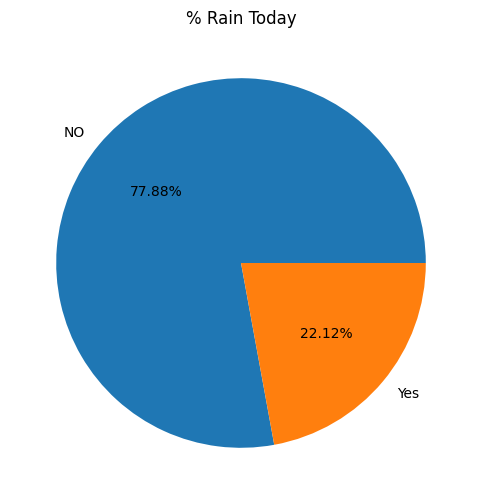

In [ ]:
#PLOT RAINTODAY
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
# plotting data on chart
plt.pie(df['RainToday'].value_counts()*100.0 /len(df),
        labels=['NO', 'Yes'],
        autopct='%.2f%%')

# displaying chart
plt.title('% Rain Today')
plt.show()

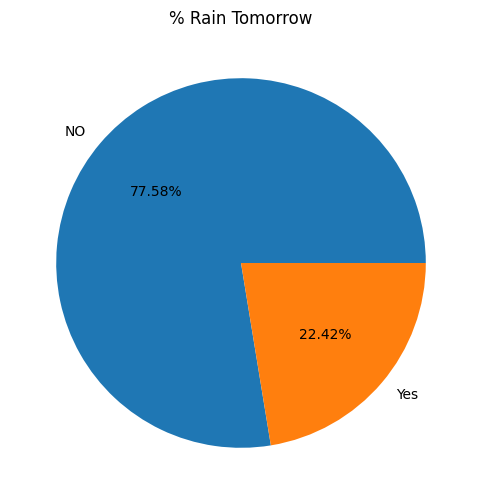

In [ ]:
#PLOT RAIN TOMORROW
plt.figure(figsize=(10,6))


# plotting data on chart
plt.pie(df['RainTomorrow'].value_counts()*100.0 /len(df),
        labels=['NO', 'Yes'],
        autopct='%.2f%%')

# displaying chart
plt.title('% Rain Tomorrow')
plt.show()

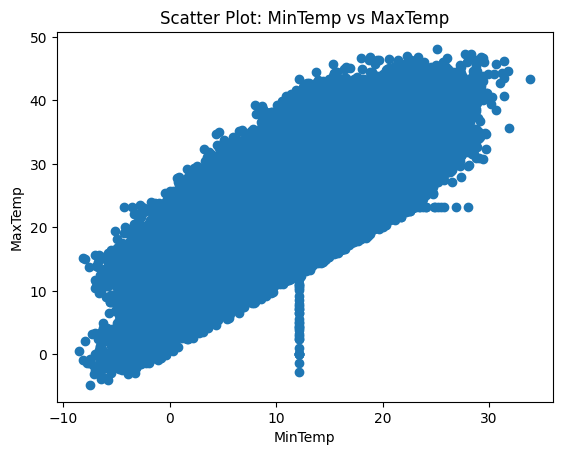

In [ ]:
# PLOT MIN AND MAX TEMP
import matplotlib.pyplot as plt

# Scatter plot between MinTemp and MaxTemp
plt.scatter(df['MinTemp'], df['MaxTemp'])
plt.title('Scatter Plot: MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()


Text(0, 0.5, 'MaxTemp')

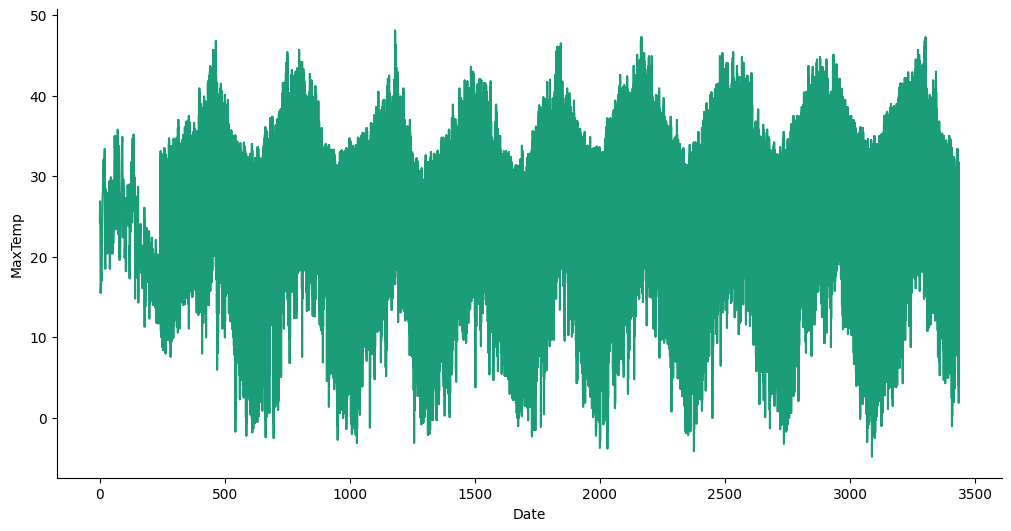

In [ ]:
#PLOT from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['MaxTemp']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('MaxTemp')


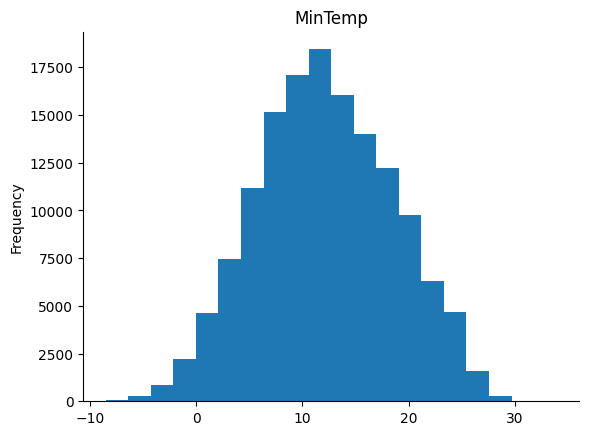

In [ ]:
from matplotlib import pyplot as plt
df['MinTemp'].plot(kind='hist', bins=20, title='MinTemp')
plt.gca().spines[['top', 'right',]].set_visible(False)

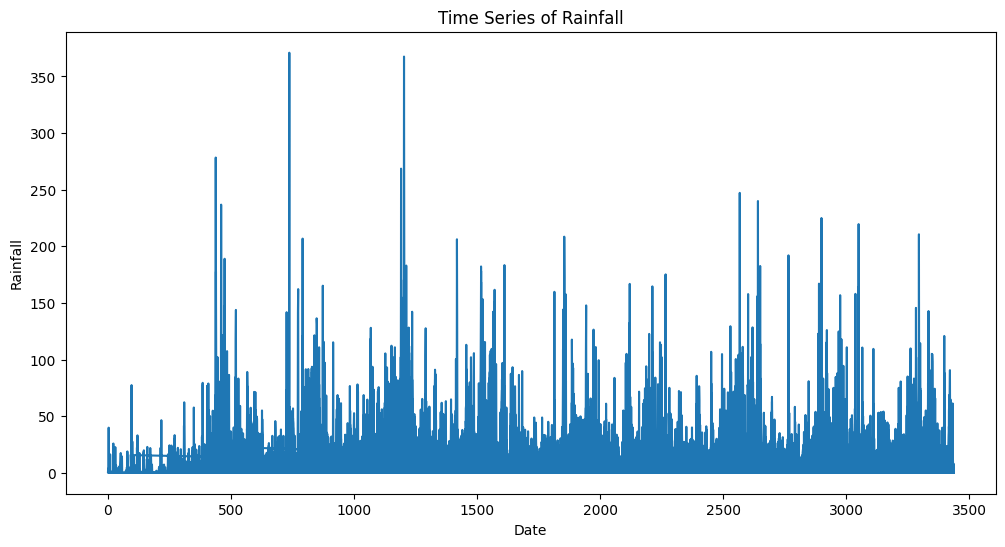

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Time Series Plot for Rainfall
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Rainfall'])
plt.title('Time Series of Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.show()




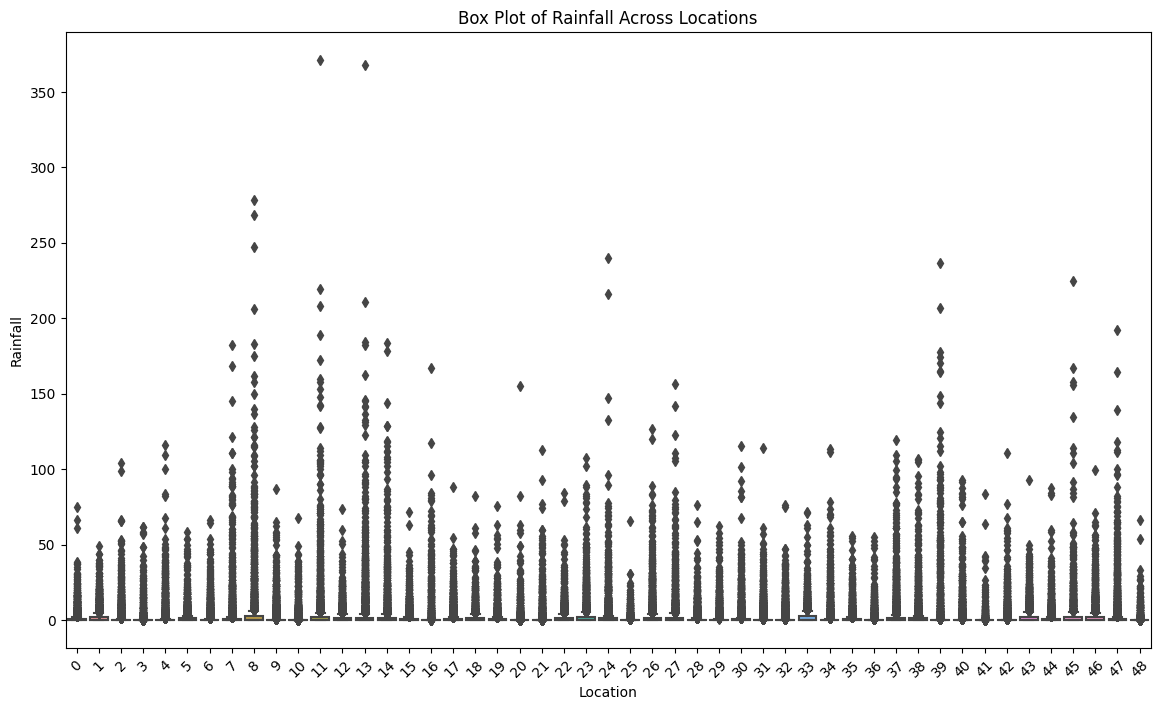

In [ ]:
# Box Plot for Rainfall Across Locations
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Rainfall', data=df)
plt.title('Box Plot of Rainfall Across Locations')
plt.xticks(rotation=45)
plt.show()


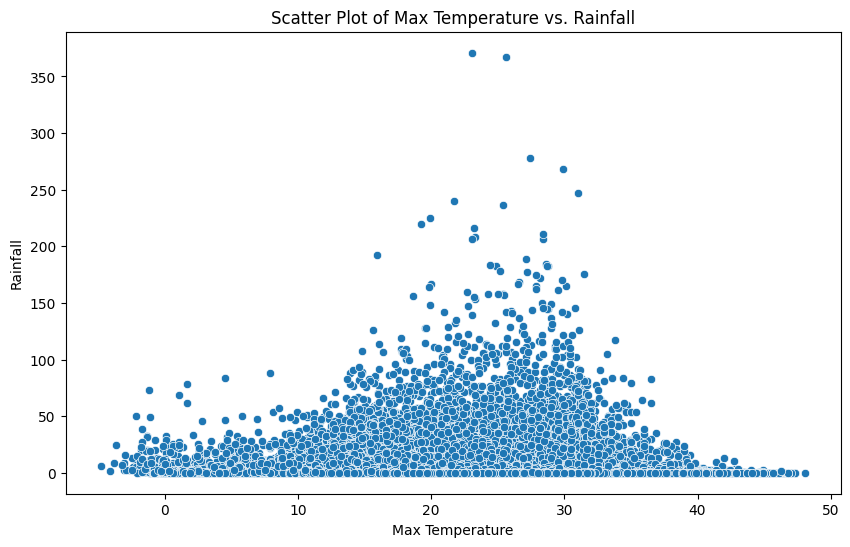

In [ ]:
# Scatter Plot for Temperature vs. Rainfall
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MaxTemp', y='Rainfall', data=df)
plt.title('Scatter Plot of Max Temperature vs. Rainfall')
plt.xlabel('Max Temperature')
plt.ylabel('Rainfall')
plt.show()

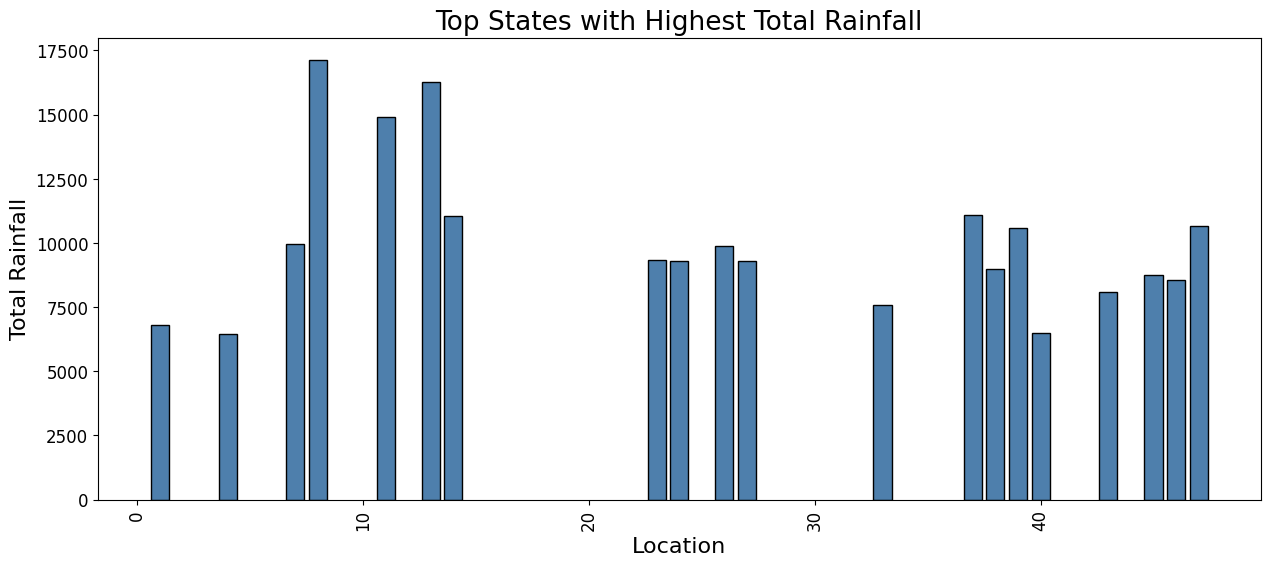

In [ ]:
Top_states_rainfall = df.groupby(["Location"]).sum().sort_values("Rainfall", ascending=False).head(20)
Top_states_rainfall = Top_states_rainfall[["Rainfall"]].round(2)
Top_states_rainfall.reset_index(inplace=True)

plt.figure(figsize=(15, 6))
plt.title("Top States with Highest Total Rainfall", fontsize=19)
plt.bar(Top_states_rainfall["Location"], Top_states_rainfall["Rainfall"], color='#4E7FAC', edgecolor='black', linewidth=1)
plt.xlabel("Location", fontsize=16)
plt.ylabel("Total Rainfall", fontsize=16)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()


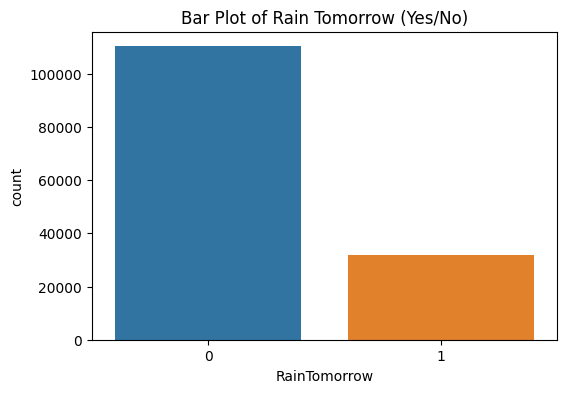

In [ ]:
# Bar Plot for Rainfall Tomorrow
plt.figure(figsize=(6, 4))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Bar Plot of Rain Tomorrow (Yes/No)')
plt.show()

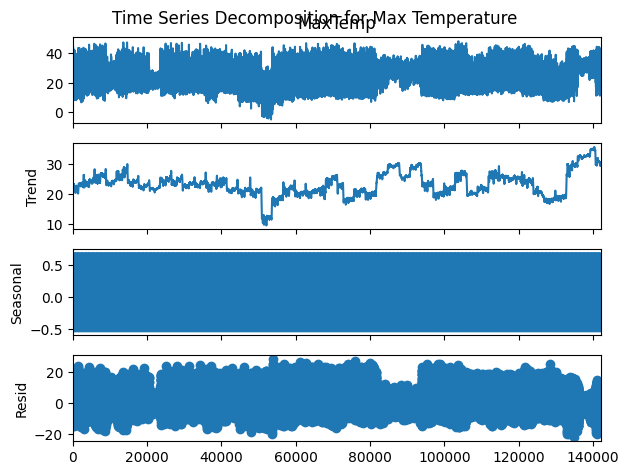

In [ ]:
# Time Series Decomposition for Temperature
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
result_temp = seasonal_decompose(df['MaxTemp'], model='additive', period=365)
result_temp.plot()
plt.suptitle('Time Series Decomposition for Max Temperature')
plt.show()

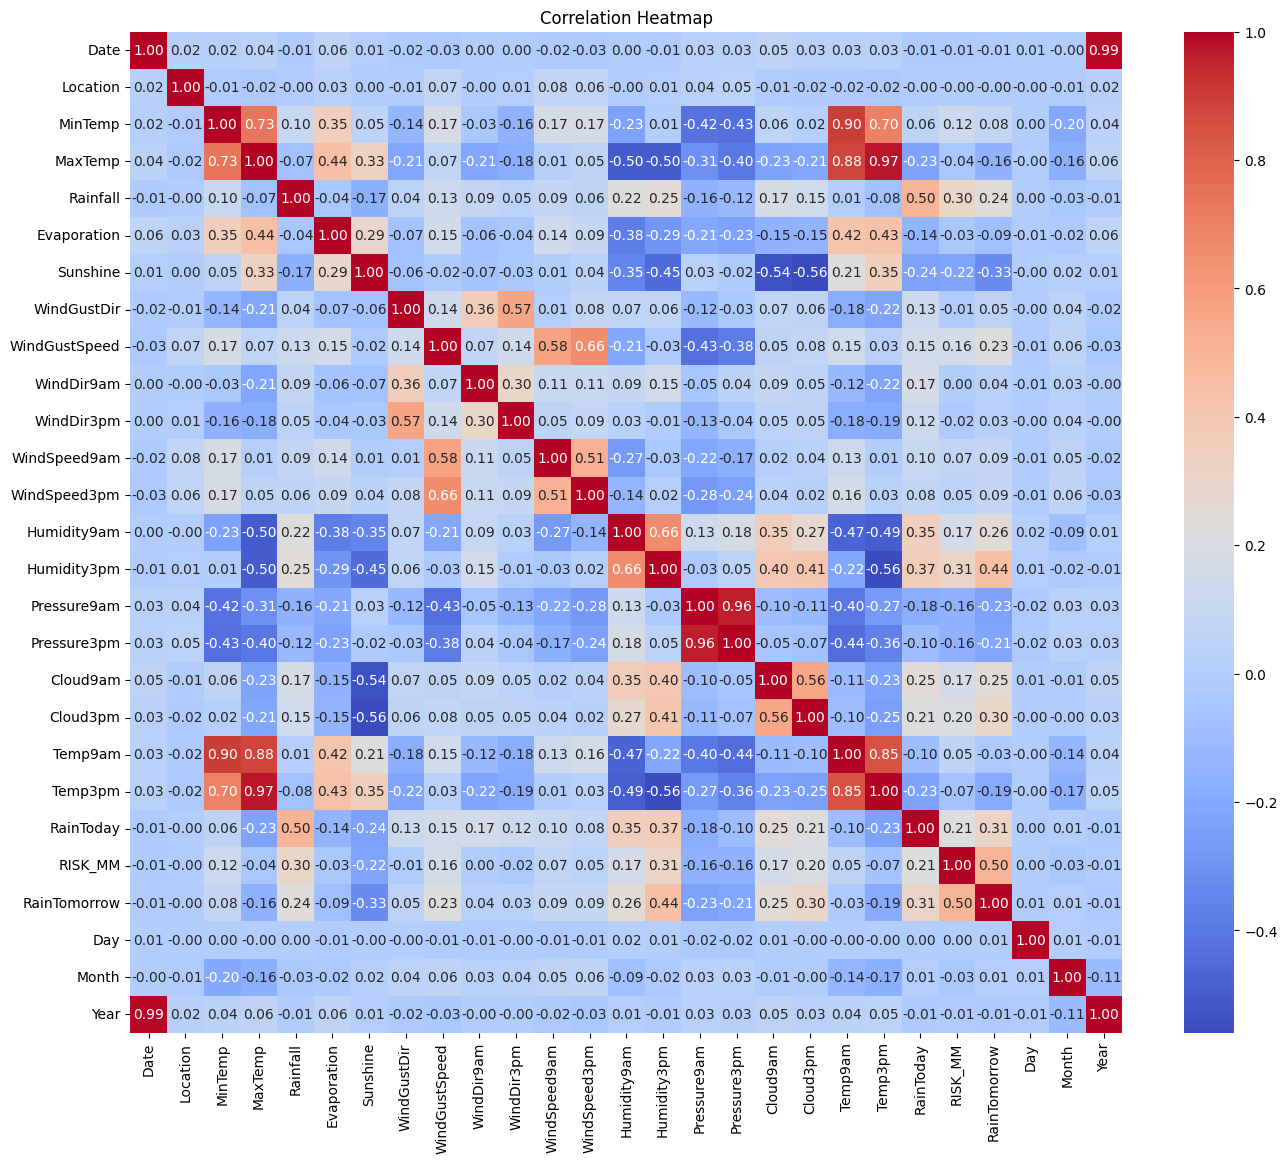

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(16,13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#GETTING CORRELATION DATA
df.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Month,Year
Date,1.000000,0.021490,0.016930,0.040321,-0.012453,0.060081,0.010147,-0.016999,-0.025140,0.001430,...,0.050723,0.032333,0.027114,0.027682,-0.011235,-0.012408,-0.010947,0.005208,-0.000337,0.993408
Location,0.021490,1.000000,-0.006194,-0.020490,-0.003457,0.032114,0.002144,-0.005055,0.069269,-0.004434,...,-0.010908,-0.015860,-0.015596,-0.022718,-0.004911,-0.002788,-0.003579,-0.000004,-0.008375,0.022265
MinTemp,0.016930,-0.006194,1.000000,0.733919,0.103314,0.353698,0.051907,-0.136321,0.173331,-0.029635,...,0.061460,0.015902,0.897999,0.699828,0.055645,0.123928,0.083717,0.001504,-0.203826,0.039126
MaxTemp,0.040321,-0.020490,0.733919,1.000000,-0.074202,0.442214,0.331505,-0.212208,0.066329,-0.212589,...,-0.226776,-0.214469,0.880087,0.969735,-0.226474,-0.044154,-0.159087,-0.000495,-0.164435,0.058300
Rainfall,-0.012453,-0.003457,0.103314,-0.074202,1.000000,-0.038186,-0.173011,0.044853,0.127250,0.085142,...,0.171613,0.145848,0.011384,-0.077553,0.500286,0.301844,0.236874,0.001129,-0.030710,-0.009242
Evaporation,0.060081,0.032114,0.353698,0.442214,-0.038186,1.000000,0.290375,-0.069170,0.147371,-0.064262,...,-0.152224,-0.147763,0.417323,0.429195,-0.141089,-0.031569,-0.089551,-0.005875,-0.021086,0.061925
Sunshine,0.010147,0.002144,0.051907,0.331505,-0.173011,0.290375,1.000000,-0.064699,-0.022479,-0.070270,...,-0.537714,-0.559379,0.210174,0.349271,-0.238980,-0.222487,-0.327029,-0.000848,0.017322,0.008079
WindGustDir,-0.016999,-0.005055,-0.136321,-0.212208,0.044853,-0.069170,-0.064699,1.000000,0.137648,0.356896,...,0.066094,0.058669,-0.178071,-0.223669,0.127651,-0.006275,0.053447,-0.001470,0.044115,-0.021880
WindGustSpeed,-0.025140,0.069269,0.173331,0.066329,0.127250,0.147371,-0.022479,0.137648,1.000000,0.074660,...,0.052281,0.080202,0.146756,0.032274,0.148244,0.156620,0.225264,-0.008919,0.058868,-0.031422
WindDir9am,0.001430,-0.004434,-0.029635,-0.212589,0.085142,-0.064262,-0.070270,0.356896,0.074660,1.000000,...,0.086578,0.054210,-0.115635,-0.219980,0.168410,0.004280,0.035776,-0.005781,0.026215,-0.001550


In [ ]:
df['Date']

0          396
1          397
2          398
3          399
4          400
          ... 
142188    3430
142189    3431
142190    3432
142191    3433
142192    3434
Name: Date, Length: 142193, dtype: int64

In [ ]:
#MODELLING RANDOM FOREST
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


# Select relevant features
selected_features = ['Humidity3pm', 'RainToday', 'Cloud3pm', 'Rainfall', 'Cloud9am', 'WindSpeed3pm']

# Add the target variable
selected_features.append('RainTomorrow')

# Create a new DataFrame with selected features
df_selected = df[selected_features]

# Drop rows with NaN values
df_selected = df_selected.dropna()

# Split the dataset into features (X) and target variable (y)
X = df_selected[selected_features[:-1]]
y = df_selected['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print("Classification Report:\n", report)

Accuracy: 0.8064
Confusion Matrix:
[[20143  1955]
 [ 3552  2789]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88     22098
           1       0.59      0.44      0.50      6341

    accuracy                           0.81     28439
   macro avg       0.72      0.68      0.69     28439
weighted avg       0.79      0.81      0.80     28439



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.4f}")

RMSE: 0.4400


In [ ]:
#MODELLING RANDOM FOREST FOR FEATURE IMPORTANCE
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score


# Select relevant features
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
            'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
            'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM']

# Add the target variable
features.append('RainTomorrow')

# Create a new DataFrame with selected features
df_selected = df[features]

# Drop rows with NaN values
df_selected = df_selected.dropna()

# Split the dataset into features (X) and target variable (y)
X = df_selected[features[:-1]]
y = df_selected['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': features[:-1], 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("Feature Importance:")
print(feature_importance_df)

# Select top k features based on importance
k = 10
selected_features = feature_importance_df.head(k)['Feature'].tolist()

# Print the selected features
print(f"\nTop {k} Features:")
print(selected_features)

# Retrain the model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

clf_selected = RandomForestClassifier(random_state=42)
clf_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_selected = clf_selected.predict(X_test_selected)

# Evaluate the model with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print(f"\nAccuracy with Selected Features: {accuracy_selected:.4f}")


Feature Importance:
          Feature  Importance
17        RISK_MM    0.822350
9     Humidity3pm    0.065099
2        Rainfall    0.029374
13       Cloud3pm    0.013083
4        Sunshine    0.012261
16      RainToday    0.010146
11    Pressure3pm    0.008271
10    Pressure9am    0.008201
8     Humidity9am    0.008093
5   WindGustSpeed    0.007750
12       Cloud9am    0.003115
15        Temp3pm    0.002637
1         MaxTemp    0.002184
0         MinTemp    0.002012
14        Temp9am    0.001918
7    WindSpeed3pm    0.001319
6    WindSpeed9am    0.001108
3     Evaporation    0.001080

Top 10 Features:
['RISK_MM', 'Humidity3pm', 'Rainfall', 'Cloud3pm', 'Sunshine', 'RainToday', 'Pressure3pm', 'Pressure9am', 'Humidity9am', 'WindGustSpeed']

Accuracy with Selected Features: 1.0000


In [ ]:
#MODELLING ANN USING TENSORFLOW AND KERAS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Select relevant features
selected_features = ['RISK_MM', 'Humidity3pm', 'Rainfall', 'Cloud3pm', 'Sunshine', 'RainToday', 'Pressure3pm', 'Pressure9am', 'Humidity9am', 'WindGustSpeed']

# Add the target variable
selected_features.append('RainTomorrow')

# Create a new DataFrame with selected features
df_selected = df[selected_features].copy()

# Drop rows with NaN values
df_selected = df_selected.dropna()

# Split the dataset into features (X) and target variable (y)
X = df_selected[selected_features[:-1]]
y = df_selected['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Epoch 1/20
2844/2844 [==============================] - 11s 3ms/step - loss: 0.1333 - accuracy: 0.9501 - val_loss: 0.0131 - val_accuracy: 0.9956
Epoch 2/20
2844/2844 [==============================] - 9s 3ms/step - loss: 0.0197 - accuracy: 0.9926 - val_loss: 0.0100 - val_accuracy: 0.9951
Epoch 3/20
2844/2844 [==============================] - 15s 5ms/step - loss: 0.0122 - accuracy: 0.9953 - val_loss: 0.0033 - val_accuracy: 0.9999
Epoch 4/20
2844/2844 [==============================] - 9s 3ms/step - loss: 0.0103 - accuracy: 0.9963 - val_loss: 0.0028 - val_accuracy: 0.9993
Epoch 5/20
2844/2844 [==============================] - 9s 3ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 0.0022 - val_accuracy: 0.9999
Epoch 6/20
2844/2844 [==============================] - 14s 5ms/step - loss: 0.0085 - accuracy: 0.9970 - val_loss: 0.0030 - val_accuracy: 0.9989
Epoch 7/20
2844/2844 [==============================] - 8s 3ms/step - loss: 0.0080 - accuracy: 0.9969 - val_loss: 0.0046 - val_accura

In [ ]:
#REPORT
from sklearn.metrics import classification_report

# Predict on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Create a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


889/889 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22098
           1       1.00      1.00      1.00      6341

    accuracy                           1.00     28439
   macro avg       1.00      1.00      1.00     28439
weighted avg       1.00      1.00      1.00     28439



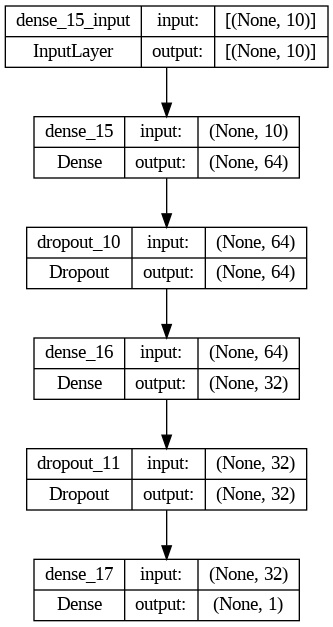

In [ ]:
#DISPLAYING MODEL
from tensorflow.keras.utils import plot_model


# Specify the file path to save the visualization
plot_file_path = 'model_visualization.png'

# Plot the model architecture and save the image
plot_model(model, to_file=plot_file_path, show_shapes=True, show_layer_names=True)

# Display the image if using Jupyter Notebook or a similar environment
from IPython.display import Image
Image(filename=plot_file_path)


Epoch 1/20
2844/2844 [==============================] - 9s 3ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 3.5536e-04 - val_accuracy: 1.0000
Epoch 2/20
2844/2844 [==============================] - 11s 4ms/step - loss: 0.0053 - accuracy: 0.9981 - val_loss: 0.0015 - val_accuracy: 0.9995
Epoch 3/20
2844/2844 [==============================] - 8s 3ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.0023 - val_accuracy: 0.9995
Epoch 4/20
2844/2844 [==============================] - 12s 4ms/step - loss: 0.0053 - accuracy: 0.9982 - val_loss: 9.7413e-04 - val_accuracy: 1.0000
Epoch 5/20
2844/2844 [==============================] - 14s 5ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0050 - val_accuracy: 0.9981
Epoch 6/20
2844/2844 [==============================] - 8s 3ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.0019 - val_accuracy: 0.9992
Epoch 7/20
2844/2844 [==============================] - 10s 4ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 5.3454e-04

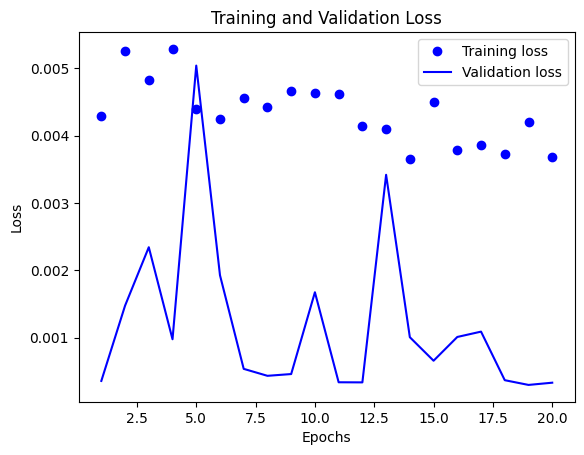

In [ ]:
#DISPLAYING EPOCHS LOSS
import matplotlib.pyplot as plt
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)
# Assuming 'history' is the variable containing the training history
history_dict = history.history

# Plot training and validation loss values
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


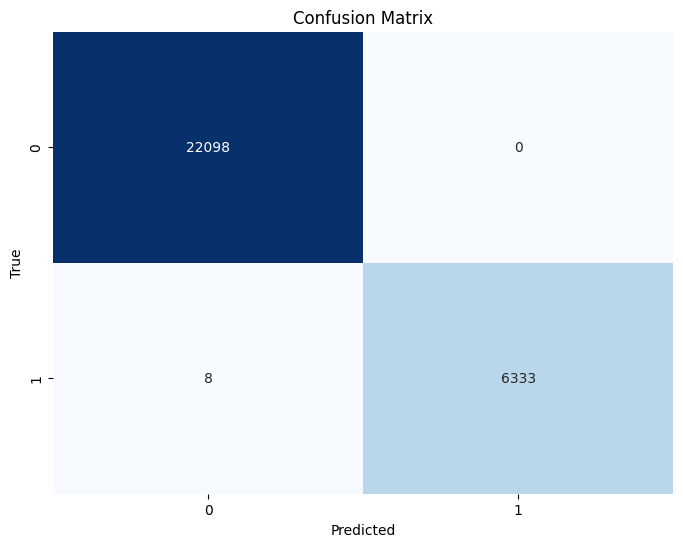

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


target_column = 'RainTomorrow'

# Extract features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SMOTE for oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Adjust the threshold (e.g., set it to 0.3)
threshold = 0.3
y_pred_adjusted = (y_pred_proba > threshold).astype(int)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_adjusted))
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Confusion Matrix:
[[22098     0]
 [    0  6341]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22098
           1       1.00      1.00      1.00      6341

    accuracy                           1.00     28439
   macro avg       1.00      1.00      1.00     28439
weighted avg       1.00      1.00      1.00     28439

Accuracy: 0.9997186961566863


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

target_column = 'RainTomorrow'


df = df.dropna()

# Select features and target
X = df[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Rainfall', 'Humidity9am', 'WindSpeed9am']]
y = df[target_column]

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.8102957206652835
Confusion Matrix:
[[21200   898]
 [ 4497  1844]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89     22098
           1       0.67      0.29      0.41      6341

    accuracy                           0.81     28439
   macro avg       0.75      0.63      0.65     28439
weighted avg       0.79      0.81      0.78     28439



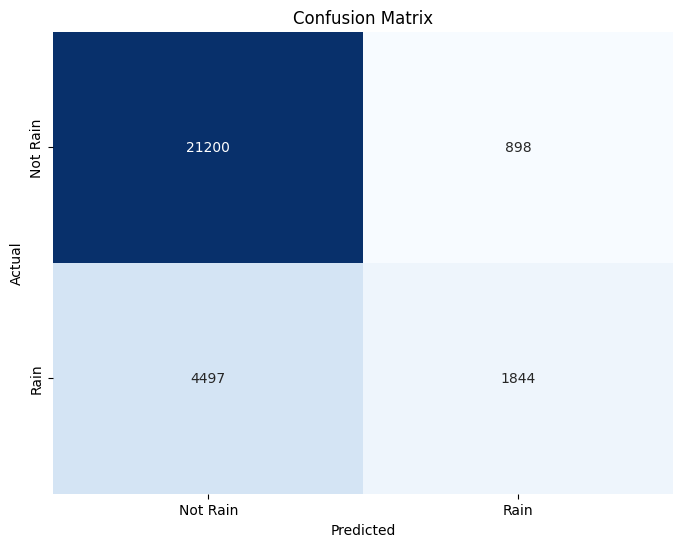

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Rain', 'Rain'], yticklabels=['Not Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


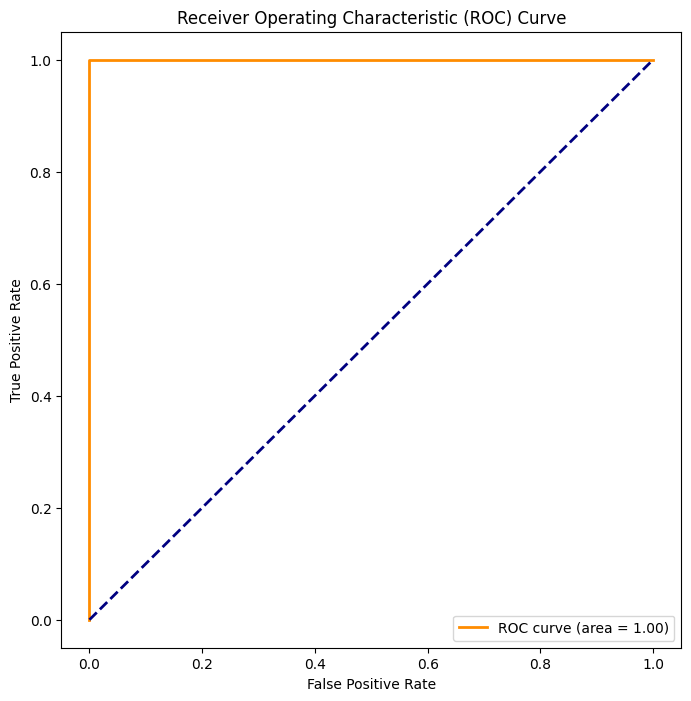

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

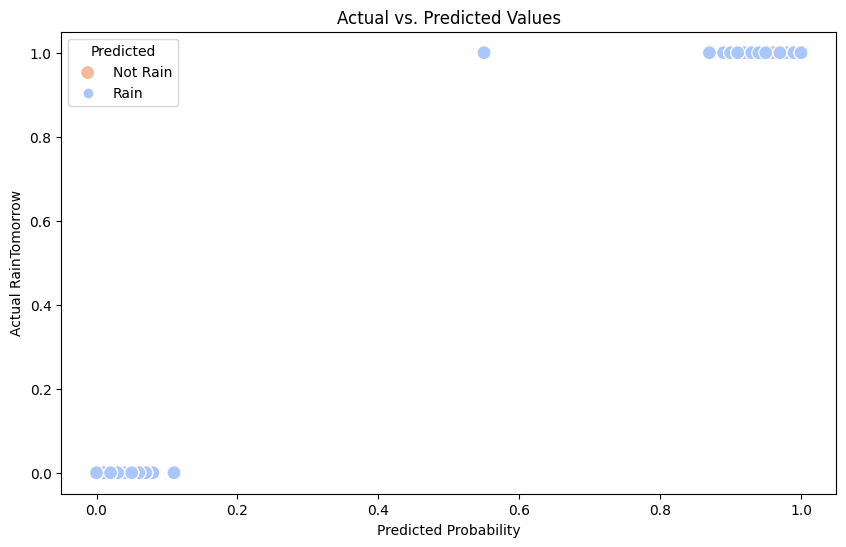

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_proba, y=y_test, hue=y_pred, palette='coolwarm', marker='o', s=100)
plt.xlabel('Predicted Probability')
plt.ylabel('Actual RainTomorrow')
plt.title('Actual vs. Predicted Values')
plt.legend(title='Predicted', loc='upper left', labels=['Not Rain', 'Rain'])
plt.show()

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Day,Month,Year
0,396,2,13.4,22.9,0.6,5.469824,7.624853,13,44.0,13,...,8.000000,4.503167,16.9,21.8,0,0.0,0,0,11,1
1,397,2,7.4,25.1,0.0,5.469824,7.624853,14,44.0,6,...,4.437189,4.503167,17.2,24.3,0,0.0,0,1,11,1
2,398,2,12.9,25.7,0.0,5.469824,7.624853,15,46.0,13,...,4.437189,2.000000,21.0,23.2,0,0.0,0,2,11,1
3,399,2,9.2,28.0,0.0,5.469824,7.624853,4,24.0,9,...,4.437189,4.503167,18.1,26.5,0,1.0,0,3,11,1
4,400,2,17.5,32.3,1.0,5.469824,7.624853,13,41.0,1,...,7.000000,8.000000,17.8,29.7,0,0.2,0,4,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3430,41,3.5,21.8,0.0,5.469824,7.624853,0,31.0,2,...,4.437189,4.503167,9.4,20.9,0,0.0,0,19,5,10
142189,3431,41,2.8,23.4,0.0,5.469824,7.624853,0,31.0,9,...,4.437189,4.503167,10.1,22.4,0,0.0,0,20,5,10
142190,3432,41,3.6,25.3,0.0,5.469824,7.624853,6,22.0,9,...,4.437189,4.503167,10.9,24.5,0,0.0,0,21,5,10
142191,3433,41,5.4,26.9,0.0,5.469824,7.624853,3,37.0,9,...,4.437189,4.503167,12.5,26.1,0,0.0,0,22,5,10


In [ ]:
df['Date']

0          396
1          397
2          398
3          399
4          400
          ... 
142188    3430
142189    3431
142190    3432
142191    3433
142192    3434
Name: Date, Length: 142193, dtype: int64

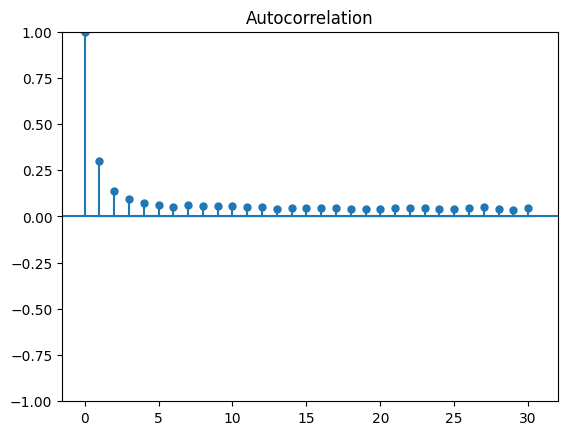

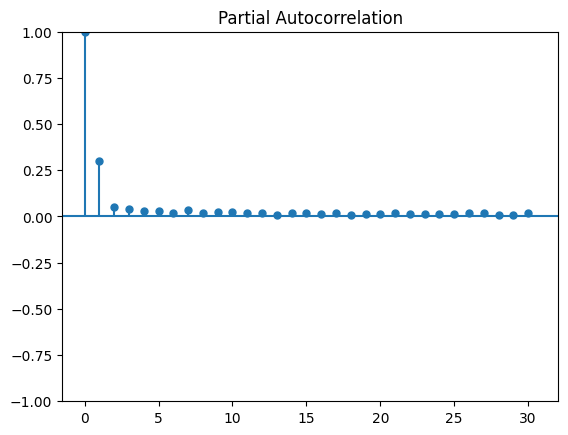

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Rainfall'], lags=30)
plt.show()

plot_pacf(df['Rainfall'], lags=30)
plt.show()


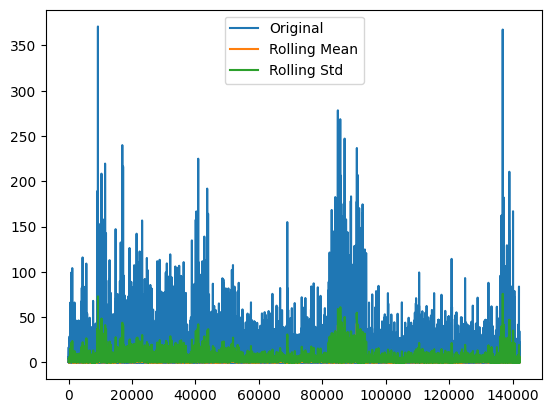

In [ ]:
rolling_mean = df['Rainfall'].rolling(window=30).mean()
rolling_std = df['Rainfall'].rolling(window=30).std()

plt.plot(df['Rainfall'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

Mean Absolute Error (MAE): 2.8093
Mean Squared Error (MSE): 46.0901
Root Mean Squared Error (RMSE): 6.7890


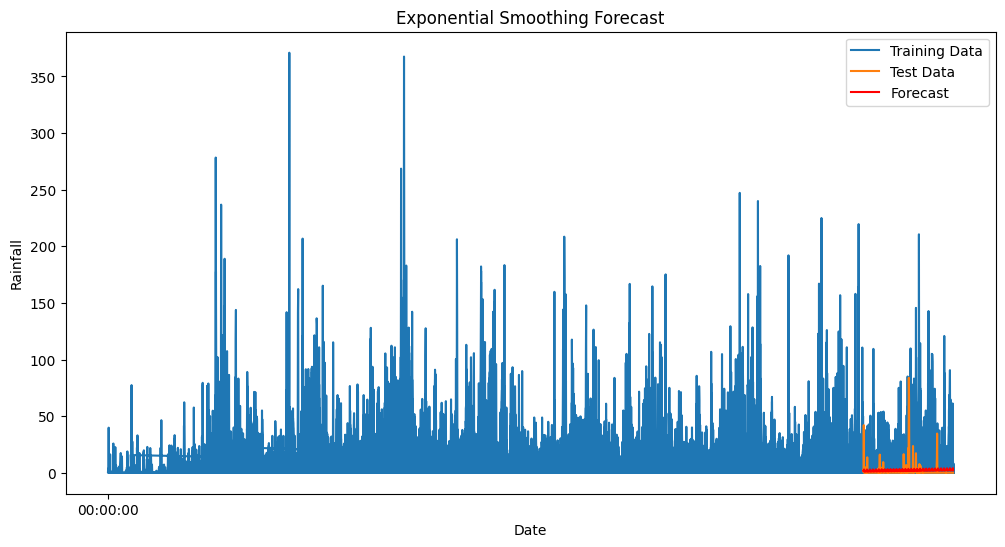

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train_data['Rainfall'], trend='add', seasonal='add', seasonal_periods=12)
result = model.fit()
forecast = result.forecast(len(test_data))
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt



# Evaluate the model
mae = mean_absolute_error(test_data['Rainfall'], forecast)
mse = mean_squared_error(test_data['Rainfall'], forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Rainfall'], label='Training Data')
plt.plot(test_data.index, test_data['Rainfall'], label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.legend()
plt.show()


Fold 1 RMSE: 13.9306


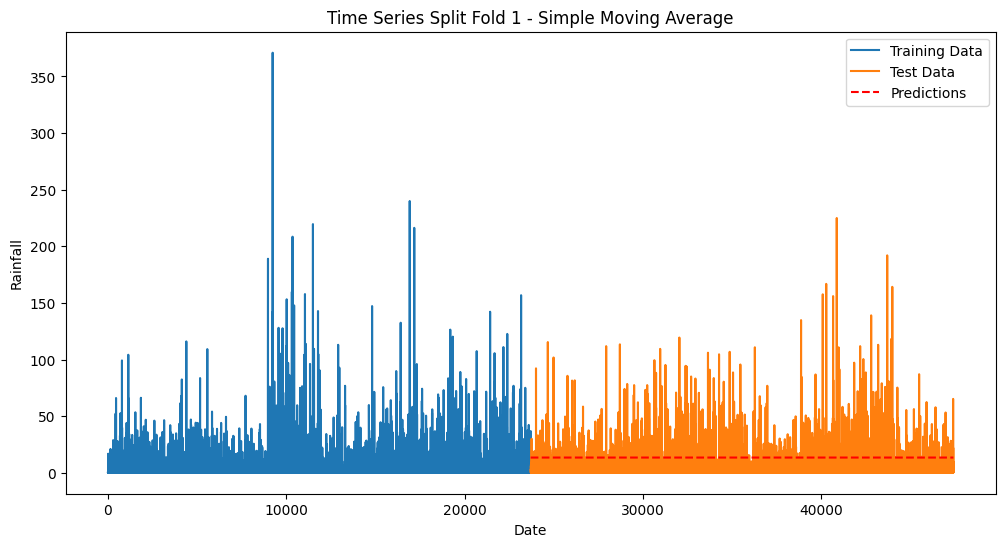

Fold 2 RMSE: 7.6803


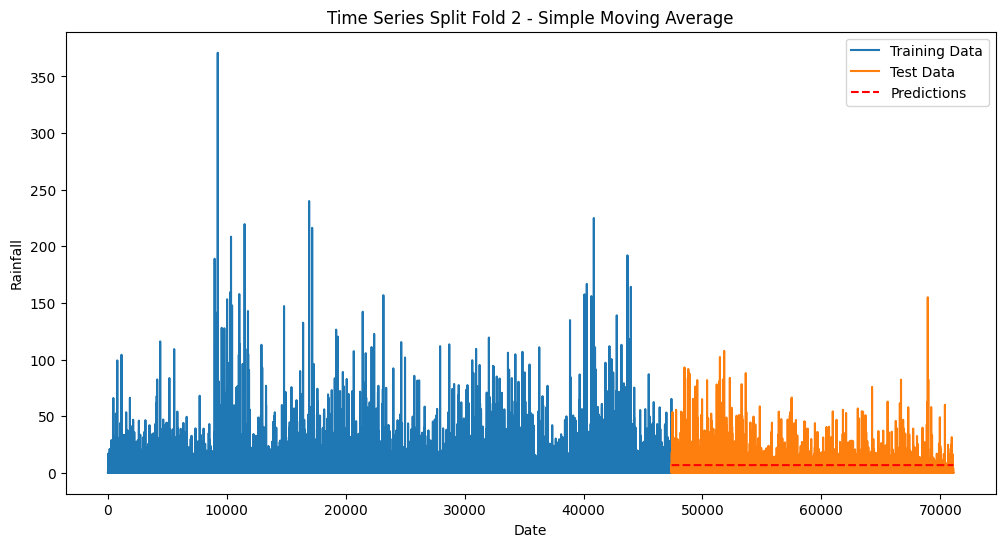

Fold 3 RMSE: 11.4800


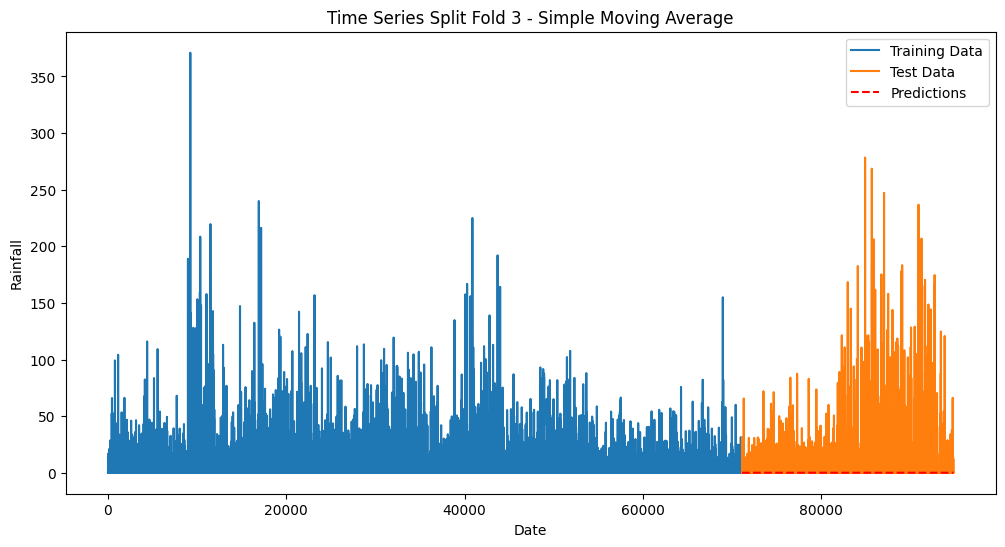

Fold 4 RMSE: 5.3049


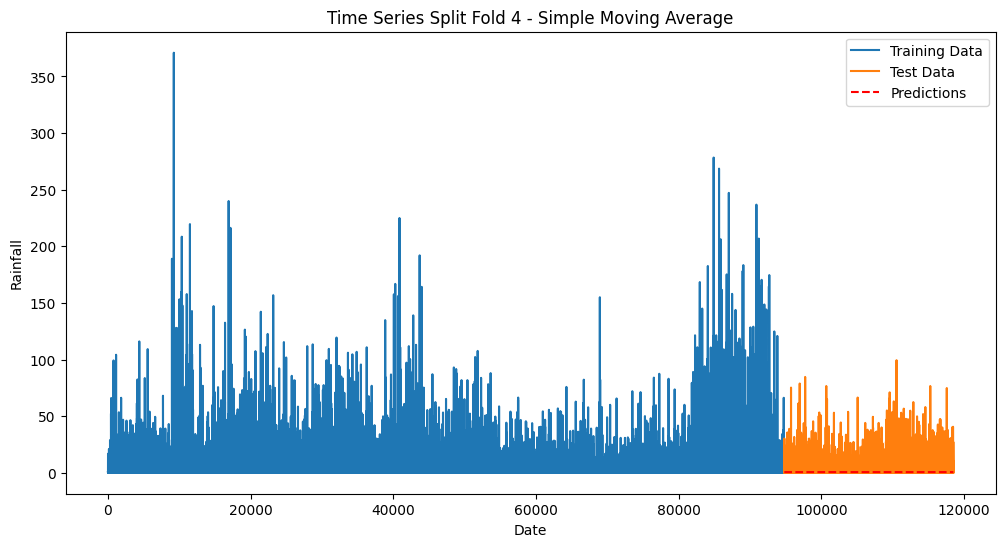

Fold 5 RMSE: 8.4521


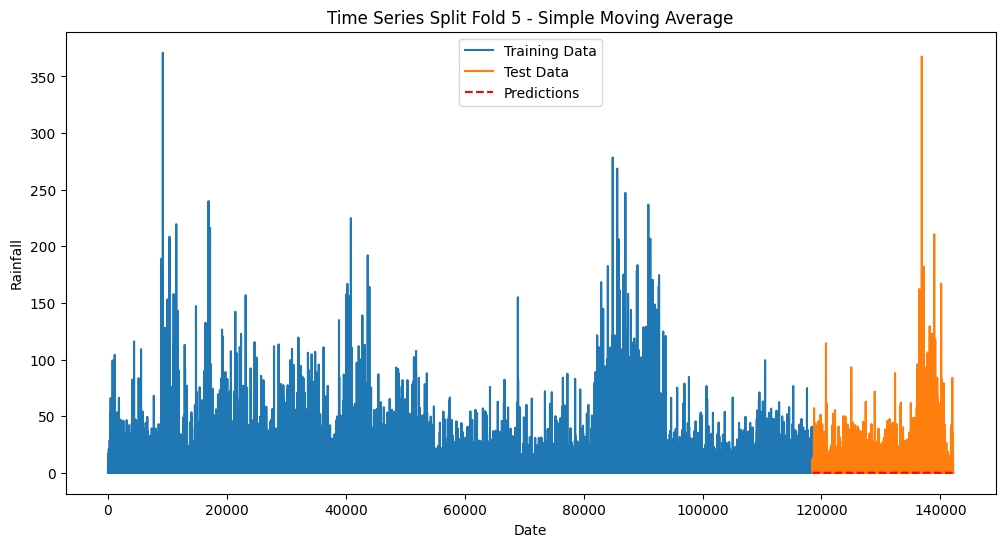

In [ ]:
from sklearn.model_selection import TimeSeriesSplit    # Train and evaluate your time series model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming df is your time series data
tscv = TimeSeriesSplit(n_splits=5)

for fold, (train_index, test_index) in enumerate(tscv.split(df)):
    train, test = df.iloc[train_index], df.iloc[test_index]

    # Simple moving average model (you can replace this with your model)
    window_size = 5
    predictions = train['Rainfall'].rolling(window=window_size).mean().iloc[-1]

    # Evaluate the model
    mse = mean_squared_error(test['Rainfall'], [predictions] * len(test))
    rmse = np.sqrt(mse)
    print(f'Fold {fold + 1} RMSE: {rmse:.4f}')

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['Rainfall'], label='Training Data')
    plt.plot(test.index, test['Rainfall'], label='Test Data')
    plt.plot(test.index, [predictions] * len(test), label='Predictions', color='red', linestyle='dashed')
    plt.title(f'Time Series Split Fold {fold + 1} - Simple Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Rainfall')
    plt.legend()
    plt.show()


In [ ]:
'''# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Split the data into training and testing sets
train_data = df.iloc[:-test_size]
test_data = df.iloc[-test_size:]'''


"# Convert the 'Date' column to datetime format\ndf['Date'] = pd.to_datetime(df['Date'])\n\n# Set the 'Date' column as the index\ndf.set_index('Date', inplace=True)\n\n# Split the data into training and testing sets\ntrain_data = df.iloc[:-test_size]\ntest_data = df.iloc[-test_size:]"

In [ ]:
'''from statsmodels.tsa.arima.model import ARIMA

# Assuming df is your DataFrame
# Check for and handle missing values
df = df.dropna()

# Set the Date column as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Specify the size of the testing set
test_size = 365  # You can adjust this based on your requirements

# Split the data into training and testing sets
train_data = df.iloc[:-test_size].copy()
test_data = df.iloc[-test_size:].copy()
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1
# Fit ARIMA model
arima_model = ARIMA(train_data, order=(p, d, q))
arima_result = arima_model.fit()

# Make predictions
arima_predictions = arima_result.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Evaluate ARIMA model
arima_rmse = rmse(test_data, arima_predictions)
print(f'ARIMA RMSE: {arima_rmse:.4f}')
'''

"from statsmodels.tsa.arima.model import ARIMA\n\n# Assuming df is your DataFrame\n# Check for and handle missing values\ndf = df.dropna()\n\n# Set the Date column as the index\ndf['Date'] = pd.to_datetime(df['Date'])\ndf.set_index('Date', inplace=True)\n\n# Specify the size of the testing set\ntest_size = 365  # You can adjust this based on your requirements\n\n# Split the data into training and testing sets\ntrain_data = df.iloc[:-test_size].copy()\ntest_data = df.iloc[-test_size:].copy()\np = 1  # Autoregressive order\nd = 1  # Differencing order\nq = 1\n# Fit ARIMA model\narima_model = ARIMA(train_data, order=(p, d, q))\narima_result = arima_model.fit()\n\n# Make predictions\narima_predictions = arima_result.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)\n\n# Evaluate ARIMA model\narima_rmse = rmse(test_data, arima_predictions)\nprint(f'ARIMA RMSE: {arima_rmse:.4f}')\n"

In [ ]:
'''import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse
from datetime import datetime

# Load your dataset (assuming the dataset is stored in a DataFrame named 'df')
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the relevant columns for time series analysis
time_series_data = df[['Date', 'Rainfall']]

# Set the 'Date' column as the index
time_series_data.set_index('Date', inplace=True)

# Train-test split
train_data, test_data = train_test_split(time_series_data, test_size=0.2, shuffle=False)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Testing Data')
plt.title('Rainfall Time Series Data')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.legend()
plt.show()

# ARIMA Model
order = (1, 1, 1)  # Adjust these values based on model diagnostics
arima_model = ARIMA(train_data, order=order)
arima_results = arima_model.fit()

# Make predictions
arima_predictions = arima_results.get_forecast(steps=len(test_data))
arima_mean = arima_predictions.predicted_mean

# Evaluate ARIMA model
arima_rmse = rmse(test_data, arima_mean)
print(f'ARIMA RMSE: {arima_rmse:.4f}')

# SARIMA Model
seasonal_order = (1, 1, 1, 12)  # Adjust these values based on model diagnostics
sarima_model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
sarima_results = sarima_model.fit()

# Make predictions
sarima_predictions = sarima_results.get_forecast(steps=len(test_data))
sarima_mean = sarima_predictions.predicted_mean

# Evaluate SARIMA model
sarima_rmse = rmse(test_data, sarima_mean)
print(f'SARIMA RMSE: {sarima_rmse:.4f}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Testing Data', color='blue')
plt.plot(arima_mean, label='ARIMA Predictions', color='orange')
plt.plot(sarima_mean, label='SARIMA Predictions', color='green')
plt.title('ARIMA and SARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Rainfall')
plt.legend()
plt.show()
'''

"import pandas as pd\nimport matplotlib.pyplot as plt\nfrom statsmodels.tsa.arima.model import ARIMA\nfrom statsmodels.tsa.statespace.sarimax import SARIMAX\nfrom sklearn.model_selection import train_test_split\nfrom statsmodels.tools.eval_measures import rmse\nfrom datetime import datetime\n\n# Load your dataset (assuming the dataset is stored in a DataFrame named 'df')\n# Ensure the 'Date' column is in datetime format\ndf['Date'] = pd.to_datetime(df['Date'])\n\n# Extract the relevant columns for time series analysis\ntime_series_data = df[['Date', 'Rainfall']]\n\n# Set the 'Date' column as the index\ntime_series_data.set_index('Date', inplace=True)\n\n# Train-test split\ntrain_data, test_data = train_test_split(time_series_data, test_size=0.2, shuffle=False)\n\n# Plot the time series data\nplt.figure(figsize=(12, 6))\nplt.plot(train_data, label='Training Data')\nplt.plot(test_data, label='Testing Data')\nplt.title('Rainfall Time Series Data')\nplt.xlabel('Date')\nplt.ylabel('Rainfall